In [19]:
import os
import sys
import pandas as pd
import seaborn as sns
import numpy as np

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df= pd.read_csv('/content/drive/MyDrive/DataScience/customer-segmentation.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [22]:
df.shape

(9800, 18)

In [23]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [24]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

#Data Exploratory 
Explore country, segment, sales, city, customer

In [25]:
df['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

In [26]:
df['Country'].value_counts()

United States    9800
Name: Country, dtype: int64

In [27]:
df['Segment'].value_counts()

Consumer       5101
Corporate      2953
Home Office    1746
Name: Segment, dtype: int64

In [28]:
df['Country'].value_counts()

United States    9800
Name: Country, dtype: int64

In [29]:
df['City'].value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
San Mateo          1
Cheyenne           1
Conway             1
Melbourne          1
Springdale         1
Name: City, Length: 529, dtype: int64

In [30]:
df['Category'].value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [31]:
df_consumer = df[df['Segment'] == 'Consumer'][['Customer ID', 'Ship Mode', 'Category', 'Sales']]
df_consumer.head()

,Customer ID,Ship Mode,Category,Sales
0,CG-12520,Second Class,Furniture,261.9600
1,CG-12520,Second Class,Furniture,731.9400
3,SO-20335,Standard Class,Furniture,957.5775
4,SO-20335,Standard Class,Office Supplies,22.3680
5,BH-11710,Standard Class,Furniture,48.8600


One hot encoding categorical

In [32]:
df_consumer_category = pd.get_dummies(df_consumer['Category'])
df_consumer_ship =  pd.get_dummies(df_consumer['Ship Mode'])

df_consumer = pd.concat([df_consumer, df_consumer_category, df_consumer_ship], axis=1)

In [33]:
df_consumer.drop(['Ship Mode', 'Category'], axis=1, inplace=True)

In [34]:
df_consumer.head()

,Customer ID,Sales,Furniture,Office Supplies,Technology,First Class,Same Day,Second Class,Standard Class
0,CG-12520,261.9600,1,0,0,0,0,1,0
1,CG-12520,731.9400,1,0,0,0,0,1,0
3,SO-20335,957.5775,1,0,0,0,0,0,1
4,SO-20335,22.3680,0,1,0,0,0,0,1
5,BH-11710,48.8600,1,0,0,0,0,0,1


Aggregate per User
Apa yang kita butuh per customer:

Sales: Average, Total
Total Transaksi
Furniture, Office Supplies: Average
First Class, Same Day, Second Class: Average

In [35]:
df_consumer.groupby('Customer ID').mean()

,Sales,Furniture,Office Supplies,Technology,First Class,Same Day,Second Class,Standard Class
Customer ID,,,,,,,,
AA-10315,505.778182,0.090909,0.727273,0.181818,0.090909,0.000000,0.000000,0.909091
AA-10375,70.426000,0.066667,0.733333,0.200000,0.266667,0.000000,0.200000,0.533333
AA-10480,149.209333,0.166667,0.666667,0.166667,0.000000,0.083333,0.000000,0.916667
AA-10645,282.607500,0.444444,0.444444,0.111111,0.388889,0.000000,0.000000,0.611111
AB-10015,147.692667,0.333333,0.500000,0.166667,0.833333,0.000000,0.000000,0.166667
...,...,...,...,...,...,...,...,...
VS-21820,131.997625,0.375000,0.500000,0.125000,0.000000,0.000000,0.250000,0.750000
WB-21850,175.134571,0.142857,0.628571,0.228571,0.171429,0.314286,0.000000,0.514286
XP-21865,84.809214,0.142857,0.750000,0.107143,0.071429,0.000000,0.107143,0.821429


In [36]:
df_consumer_agg = df_consumer.groupby('Customer ID').agg({

    # ship mode
    'First Class': [('avg_first_class', 'mean')],
    'Second Class': [('avg_second_class', 'mean')],
    'Same Day': [('avg_same_day', 'mean')],
    'Standard Class': [('avg_standard_class', 'mean')],
    
    # category
    'Furniture': [('avg_furniture', 'mean')],
    'Office Supplies': [('avg_office_sup', 'mean')],
    'Technology': [('avg_tech', 'mean')],
    
    # sales
    'Sales': [('avg_sales', 'mean'), ('total_trx', 'count'), ('total_sales', 'sum')]
})
df_consumer_agg

First Class     Second Class     Same Day     Standard Class  \
            avg_first_class avg_second_class avg_same_day avg_standard_class   
Customer ID                                                                    
AA-10315           0.090909         0.000000     0.000000           0.909091   
AA-10375           0.266667         0.200000     0.000000           0.533333   
AA-10480           0.000000         0.000000     0.083333           0.916667   
AA-10645           0.388889         0.000000     0.000000           0.611111   
AB-10015           0.833333         0.000000     0.000000           0.166667   
...                     ...              ...          ...                ...   
VS-21820           0.000000         0.250000     0.000000           0.750000   
WB-21850           0.171429         0.000000     0.314286           0.514286   
XP-21865           0.071429         0.107143     0.000000           0.821429   
ZC-21910           0.129032         0.032258     0.000000           0.838710   
ZD-21925           0.111111         0.333333     0.222222           0.333333   

                Furniture Office Supplies Technology       Sales            \
            avg_furniture  avg_office_sup   avg_tech   avg_sales total_trx   
Customer ID                                                                  
AA-10315         0.090909        0.727273   0.181818  505.778182        11   
AA-10375         0.066667        0.733333   0.200000   70.426000        15   
AA-10480         0.166667        0.666667   0.166667  149.209333        12   
AA-10645         0.444444        0.444444   0.111111  282.607500        18   
AB-10015         0.333333        0.500000   0.166667  147.692667         6   
...                   ...             ...        ...         ...       ...   
VS-21820         0.375000        0.500000   0.125000  131.997625         8   
WB-21850         0.142857        0.628571   0.228571  175.134571        35   
XP-21865         0.142857        0.750000   0.107143   84.809214        28   
ZC-21910         0.258065        0.548387   0.193548  258.893774        31   
ZD-21925         0.222222        0.444444   0.333333  165.993778         9   

                         
            total_sales  
Customer ID              
AA-10315       5563.560  
AA-10375       1056.390  
AA-10480       1790.512  
AA-10645       5086.935  
AB-10015        886.156  
...                 ...  
VS-21820       1055.981  
WB-21850       6129.710  
XP-21865       2374.658  
ZC-21910       8025.707  
ZD-21925       1493.944  

[409 rows x 10 columns]

In [37]:
df_consumer_agg['First Class']['avg_first_class']

Customer ID
AA-10315    0.090909
AA-10375    0.266667
AA-10480    0.000000
AA-10645    0.388889
AB-10015    0.833333
              ...   
VS-21820    0.000000
WB-21850    0.171429
XP-21865    0.071429
ZC-21910    0.129032
ZD-21925    0.111111
Name: avg_first_class, Length: 409, dtype: float64

In [38]:
# menghilangkan level column
df_consumer_agg.columns = df_consumer_agg.columns.droplevel()

In [39]:
df_consumer_agg.head()

,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales
Customer ID,,,,,,,,,,
AA-10315,0.090909,0.0,0.000000,0.909091,0.090909,0.727273,0.181818,505.778182,11,5563.560
AA-10375,0.266667,0.2,0.000000,0.533333,0.066667,0.733333,0.200000,70.426000,15,1056.390
AA-10480,0.000000,0.0,0.083333,0.916667,0.166667,0.666667,0.166667,149.209333,12,1790.512
AA-10645,0.388889,0.0,0.000000,0.611111,0.444444,0.444444,0.111111,282.607500,18,5086.935
AB-10015,0.833333,0.0,0.000000,0.166667,0.333333,0.500000,0.166667,147.692667,6,886.156


In [40]:
df_consumer_agg['avg_first_class']

Customer ID
AA-10315    0.090909
AA-10375    0.266667
AA-10480    0.000000
AA-10645    0.388889
AB-10015    0.833333
              ...   
VS-21820    0.000000
WB-21850    0.171429
XP-21865    0.071429
ZC-21910    0.129032
ZD-21925    0.111111
Name: avg_first_class, Length: 409, dtype: float64

Scaling
Contoh efek non scaling pada perhitungan jarak.

x1  = (10.000, 0.1) --> (0.5, 0.1)

x2  = (10.200, 0.1) --> (0.51, 0.1)

distance ( x1 ,  x2 ), diangka 200an.

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_consumer_agg)

StandardScaler()

In [42]:
X = scaler.transform(df_consumer_agg)
X.shape

(409, 10)

#KMeans

In [43]:
from sklearn.cluster import KMeans

km = KMeans(3)
km.fit(X)

KMeans(n_clusters=3)

In [44]:
km.predict(X)

array([0, 1, 1, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2,
       0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0,
       1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 1, 1, 2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 0, 0, 2,
       2, 0, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 2, 1, 0, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2,
       0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 2, 1, 0,
       0, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2,

In [45]:
df_consumer_agg['cluster'] = km.predict(X)
df_consumer_agg

,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales,cluster
Customer ID,,,,,,,,,,,
AA-10315,0.090909,0.000000,0.000000,0.909091,0.090909,0.727273,0.181818,505.778182,11,5563.560,0
AA-10375,0.266667,0.200000,0.000000,0.533333,0.066667,0.733333,0.200000,70.426000,15,1056.390,1
AA-10480,0.000000,0.000000,0.083333,0.916667,0.166667,0.666667,0.166667,149.209333,12,1790.512,1
AA-10645,0.388889,0.000000,0.000000,0.611111,0.444444,0.444444,0.111111,282.607500,18,5086.935,0
AB-10015,0.833333,0.000000,0.000000,0.166667,0.333333,0.500000,0.166667,147.692667,6,886.156,2
...,...,...,...,...,...,...,...,...,...,...,...
VS-21820,0.000000,0.250000,0.000000,0.750000,0.375000,0.500000,0.125000,131.997625,8,1055.981,1
WB-21850,0.171429,0.000000,0.314286,0.514286,0.142857,0.628571,0.228571,175.134571,35,6129.710,0
XP-21865,0.071429,0.107143,0.000000,0.821429,0.142857,0.750000,0.107143,84.809214,28,2374.658,1


In [46]:
km.inertia_

3113.3147932398488

#Elbow Method

In [47]:
# flow, coba cluster dengan k yang beragam, dari 1 sampai 20. Nanti lihat plot inertia
INERTIA = []
for i in range(20):
    km_i = KMeans(i+1)
    km_i.fit(X)
    INERTIA.append(km_i.inertia_)

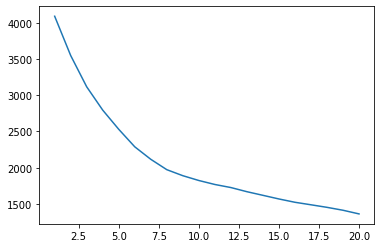

In [48]:
sns.lineplot(y=INERTIA, x=range(1, 21))

Kesimpulan: Dari grafik, penurunan drastis ada di 6, 7, atau 8.

#(Optional) Yellow Brick

In [49]:
%pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


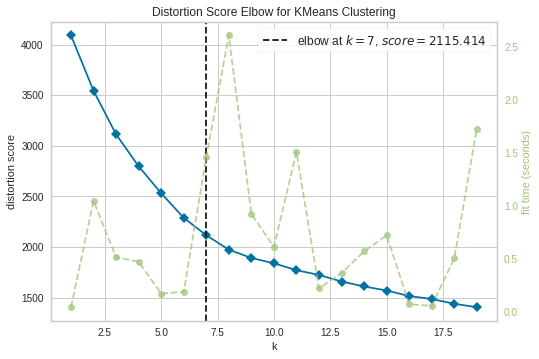

In [50]:
np.random.seed(31415)
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Kesimpulan: dari yellowbrick, k yang digunakan = 7

In [52]:
km = KMeans(n_clusters=7)
km.fit(X)
df_consumer_agg['cluster'] = km.predict(X)
df_consumer_agg

,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales,cluster
Customer ID,,,,,,,,,,,
AA-10315,0.090909,0.000000,0.000000,0.909091,0.090909,0.727273,0.181818,505.778182,11,5563.560,0
AA-10375,0.266667,0.200000,0.000000,0.533333,0.066667,0.733333,0.200000,70.426000,15,1056.390,3
AA-10480,0.000000,0.000000,0.083333,0.916667,0.166667,0.666667,0.166667,149.209333,12,1790.512,3
AA-10645,0.388889,0.000000,0.000000,0.611111,0.444444,0.444444,0.111111,282.607500,18,5086.935,0
AB-10015,0.833333,0.000000,0.000000,0.166667,0.333333,0.500000,0.166667,147.692667,6,886.156,4
...,...,...,...,...,...,...,...,...,...,...,...
VS-21820,0.000000,0.250000,0.000000,0.750000,0.375000,0.500000,0.125000,131.997625,8,1055.981,1
WB-21850,0.171429,0.000000,0.314286,0.514286,0.142857,0.628571,0.228571,175.134571,35,6129.710,0
XP-21865,0.071429,0.107143,0.000000,0.821429,0.142857,0.750000,0.107143,84.809214,28,2374.658,0


#Segment Analysis-Sales

In [51]:
df_consumer_agg['cluster'].value_counts()

1    206
2    129
0     74
Name: cluster, dtype: int64

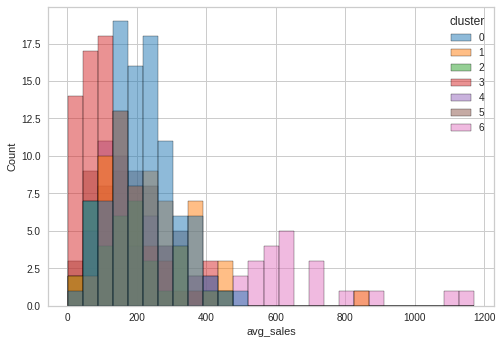

In [53]:
sns.histplot(data=df_consumer_agg, x='avg_sales', hue='cluster', palette='tab10')

#Bootstrapping

In [54]:
def bootstrap(df, column): 
    BOOTS = []
    for i in range(200):
        for j in range(7):
            # with replacement
            mean = df[df['cluster'] == j].sample(100, replace=True)[column].mean()
            BOOTS.append((j, mean))
    df_boots = pd.DataFrame(BOOTS, columns = ['cluster', column])
    return df_boots

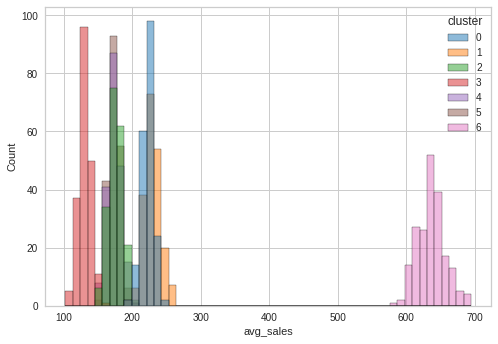

In [55]:
column = 'avg_sales'
df_boots = bootstrap(df_consumer_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

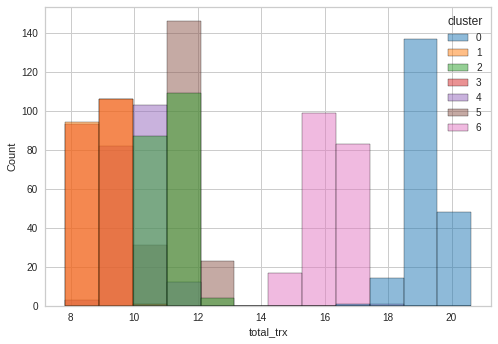

In [56]:
column = 'total_trx'
df_boots = bootstrap(df_consumer_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

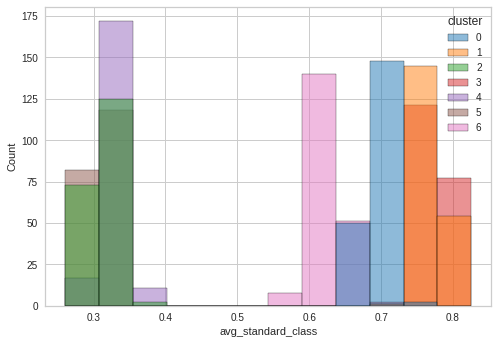

In [57]:
column = 'avg_standard_class'
df_boots = bootstrap(df_consumer_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

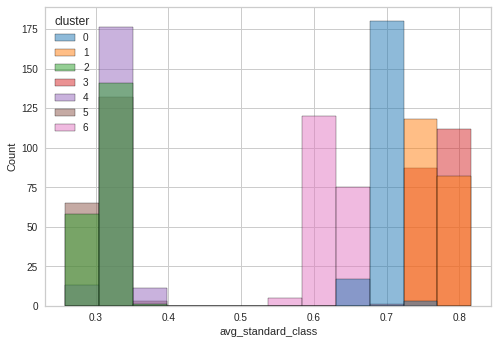

In [58]:
column = 'avg_standard_class'
df_boots = bootstrap(df_consumer_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

#Agregasi per cluster

In [59]:
df_cluster_agg = df_consumer_agg.groupby('cluster').median().reset_index()
df_cluster_agg

,cluster,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales
0,0,0.107143,0.133333,0.000,0.705882,0.200000,0.607143,0.181818,214.799857,18.0,3670.258
1,1,0.000000,0.100000,0.000,0.750000,0.333333,0.428571,0.222222,209.732286,9.0,2095.064
2,2,0.095455,0.125000,0.375,0.296703,0.193750,0.591667,0.181985,159.988389,10.0,1581.052
3,3,0.000000,0.000000,0.000,0.800000,0.118056,0.750000,0.105556,115.502850,8.0,972.862
4,4,0.476190,0.100000,0.000,0.333333,0.258333,0.555556,0.178571,147.248379,9.5,1696.035
5,5,0.000000,0.559028,0.000,0.352941,0.175192,0.607692,0.193750,166.922868,12.0,1923.058
6,6,0.076923,0.125000,0.000,0.636364,0.187500,0.562500,0.222222,607.937115,16.0,9062.864


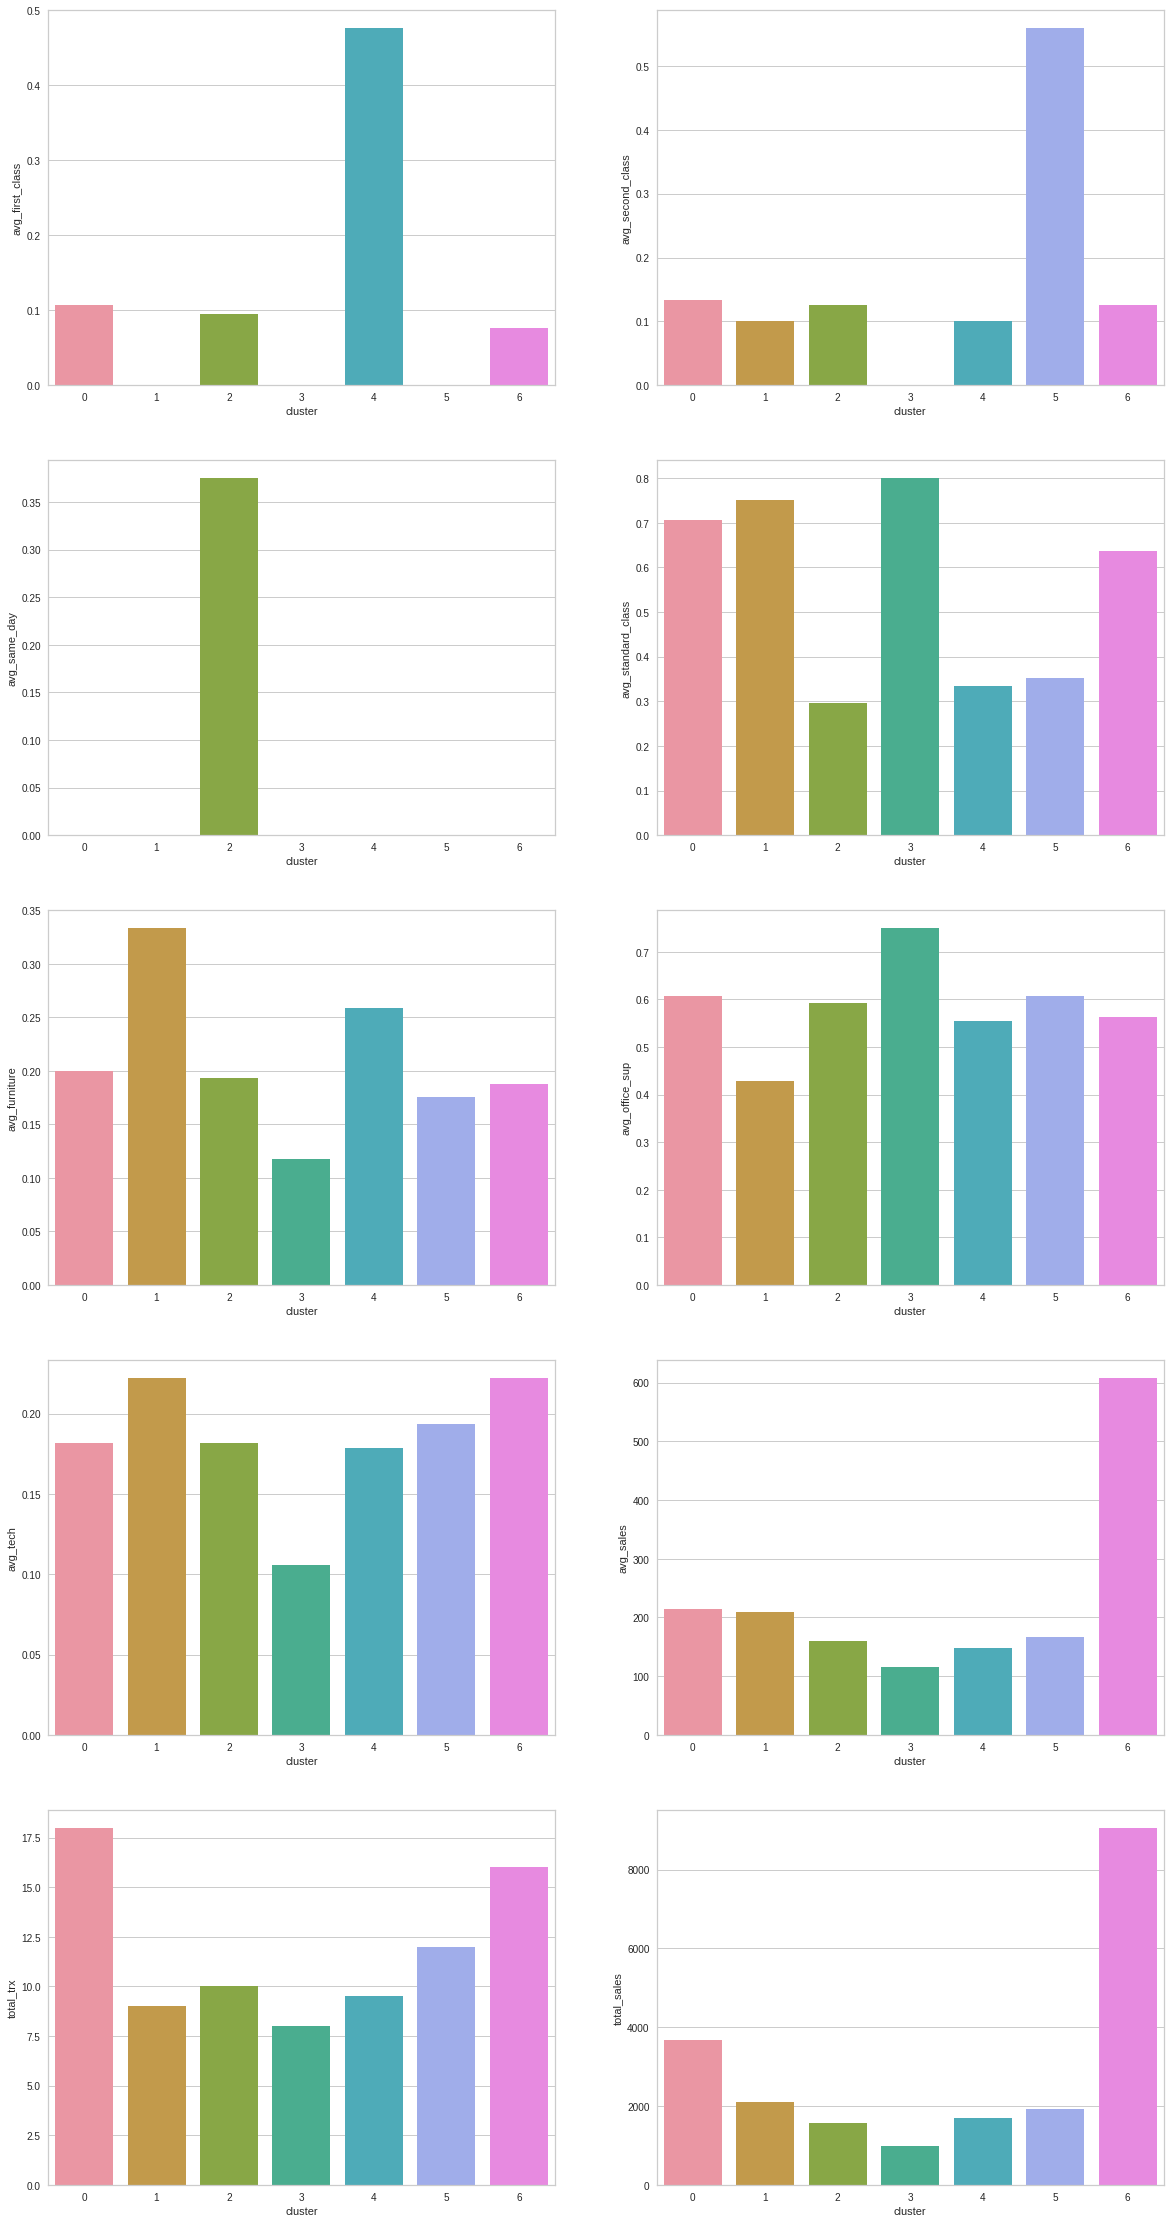

In [61]:
import matplotlib.pyplot as plt
columns = df_cluster_agg.columns[1:]

fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(20, 40))
for r in range(5): # jumlah baris / rows
    for c in range(2):  # jumlah column
        # avg_second_class => r=0, c=1
        column_idx = (r*2) + c # --> ngambil index columns yang ke (0*2) + 1 = 1
        sns.barplot(data=df_cluster_agg, x='cluster', y=columns[column_idx], ax=axs[r][c])

In [62]:
columns

Index(['avg_first_class', 'avg_second_class', 'avg_same_day',
       'avg_standard_class', 'avg_furniture', 'avg_office_sup', 'avg_tech',
       'avg_sales', 'total_trx', 'total_sales'],
      dtype='object')

Frequent item each segment

In [63]:
# hvc = high value customer berdasarkan total_sales dan average sales
customer_id_hvc = df_consumer_agg[df_consumer_agg['cluster'] == 4].index
df[df['Customer ID'].isin(customer_id_hvc)].groupby('Sub-Category').size().sort_values(ascending=False)

Sub-Category
Binders        68
Paper          65
Furnishings    63
Phones         40
Accessories    35
Art            33
Storage        32
Chairs         28
Appliances     21
Labels         18
Tables         14
Bookcases      14
Fasteners      11
Envelopes       8
Machines        7
Supplies        4
Copiers         1
dtype: int64

#Homework

In [65]:
df_corporate= df[df['Segment'] == 'Corporate'][['Customer ID', 'Ship Mode', 'Category', 'Sales']]
df_corporate.head()

,Customer ID,Ship Mode,Category,Sales
2,DV-13045,Second Class,Office Supplies,14.620
21,KB-16585,Standard Class,Office Supplies,19.460
22,KB-16585,Standard Class,Office Supplies,60.340
35,GH-14485,First Class,Technology,1097.544
36,GH-14485,First Class,Furniture,190.920


In [66]:
df_corporate_category = pd.get_dummies(df_corporate['Category'])
df_corporate_ship =  pd.get_dummies(df_corporate['Ship Mode'])

df_corporate = pd.concat([df_corporate, df_corporate_category, df_corporate_ship], axis=1)

In [67]:
df_corporate.drop(['Ship Mode', 'Category'], axis=1, inplace=True)

In [68]:
df_corporate.head()

,Customer ID,Sales,Furniture,Office Supplies,Technology,First Class,Same Day,Second Class,Standard Class
2,DV-13045,14.620,0,1,0,0,0,1,0
21,KB-16585,19.460,0,1,0,0,0,0,1
22,KB-16585,60.340,0,1,0,0,0,0,1
35,GH-14485,1097.544,0,0,1,1,0,0,0
36,GH-14485,190.920,1,0,0,1,0,0,0


In [69]:
df_corporate.groupby('Customer ID').mean()

,Sales,Furniture,Office Supplies,Technology,First Class,Same Day,Second Class,Standard Class
Customer ID,,,,,,,,
AB-10600,189.482750,0.250000,0.375000,0.375000,0.750000,0.000000,0.000000,0.250000
AC-10420,185.160000,0.200000,0.800000,0.000000,0.000000,0.000000,0.400000,0.600000
AC-10615,140.982556,0.222222,0.555556,0.222222,0.000000,0.055556,0.000000,0.944444
AG-10300,73.509600,0.400000,0.600000,0.000000,0.200000,0.000000,0.000000,0.800000
AG-10495,101.374786,0.142857,0.714286,0.142857,0.071429,0.142857,0.142857,0.642857
...,...,...,...,...,...,...,...,...
VG-21805,83.686400,0.000000,0.800000,0.200000,0.200000,0.000000,0.000000,0.800000
VP-21760,240.037571,0.357143,0.428571,0.214286,0.571429,0.000000,0.000000,0.428571
VW-21775,340.779889,0.222222,0.444444,0.333333,0.166667,0.000000,0.222222,0.611111


In [71]:
df_corporate_agg = df_corporate.groupby('Customer ID').agg({
    # Pola ==> "Kolom": [('kolom_baru', 'fungsi_aggregasi')]
    # ship mode
    'First Class': [('avg_first_class', 'mean')],
    'Second Class': [('avg_second_class', 'mean')],
    'Same Day': [('avg_same_day', 'mean')],
    'Standard Class': [('avg_standard_class', 'mean')],
    
    # category
    'Furniture': [('avg_furniture', 'mean')],
    'Office Supplies': [('avg_office_sup', 'mean')],
    'Technology': [('avg_tech', 'mean')],
    
    # sales
    'Sales': [('avg_sales', 'mean'), ('total_trx', 'count'), ('total_sales', 'sum')]
})
df_consumer_agg

,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales,cluster
Customer ID,,,,,,,,,,,
AA-10315,0.090909,0.000000,0.000000,0.909091,0.090909,0.727273,0.181818,505.778182,11,5563.560,0
AA-10375,0.266667,0.200000,0.000000,0.533333,0.066667,0.733333,0.200000,70.426000,15,1056.390,3
AA-10480,0.000000,0.000000,0.083333,0.916667,0.166667,0.666667,0.166667,149.209333,12,1790.512,3
AA-10645,0.388889,0.000000,0.000000,0.611111,0.444444,0.444444,0.111111,282.607500,18,5086.935,0
AB-10015,0.833333,0.000000,0.000000,0.166667,0.333333,0.500000,0.166667,147.692667,6,886.156,4
...,...,...,...,...,...,...,...,...,...,...,...
VS-21820,0.000000,0.250000,0.000000,0.750000,0.375000,0.500000,0.125000,131.997625,8,1055.981,1
WB-21850,0.171429,0.000000,0.314286,0.514286,0.142857,0.628571,0.228571,175.134571,35,6129.710,0
XP-21865,0.071429,0.107143,0.000000,0.821429,0.142857,0.750000,0.107143,84.809214,28,2374.658,0


In [72]:
df_corporate_agg['First Class']['avg_first_class']

Customer ID
AB-10600    0.750000
AC-10420    0.000000
AC-10615    0.000000
AG-10300    0.200000
AG-10495    0.071429
              ...   
VG-21805    0.200000
VP-21760    0.571429
VW-21775    0.166667
YC-21895    0.250000
YS-21880    0.083333
Name: avg_first_class, Length: 236, dtype: float64

In [73]:
df_corporate_agg.columns = df_corporate_agg.columns.droplevel()

In [74]:
df_corporate_agg.head()

,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales
Customer ID,,,,,,,,,,
AB-10600,0.750000,0.000000,0.000000,0.250000,0.250000,0.375000,0.375000,189.482750,8,1515.862
AC-10420,0.000000,0.400000,0.000000,0.600000,0.200000,0.800000,0.000000,185.160000,5,925.800
AC-10615,0.000000,0.000000,0.055556,0.944444,0.222222,0.555556,0.222222,140.982556,18,2537.686
AG-10300,0.200000,0.000000,0.000000,0.800000,0.400000,0.600000,0.000000,73.509600,5,367.548
AG-10495,0.071429,0.142857,0.142857,0.642857,0.142857,0.714286,0.142857,101.374786,14,1419.247


In [75]:
df_corporate_agg['avg_first_class']

Customer ID
AB-10600    0.750000
AC-10420    0.000000
AC-10615    0.000000
AG-10300    0.200000
AG-10495    0.071429
              ...   
VG-21805    0.200000
VP-21760    0.571429
VW-21775    0.166667
YC-21895    0.250000
YS-21880    0.083333
Name: avg_first_class, Length: 236, dtype: float64

##Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_corporate_agg)

StandardScaler()

In [77]:
X = scaler.transform(df_corporate_agg)
X.shape

(236, 10)

##KMeans

In [78]:
from sklearn.cluster import KMeans

km = KMeans(3)
km.fit(X)

KMeans(n_clusters=3)

In [79]:
km.predict(X)

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0,
       2, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 0, 2, 1,
       1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2,
       2, 0, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2,
       1, 2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 1, 1,
       0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 2, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2,
       2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0, 1,
       2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2], dtype=int32)

In [80]:
df_corporate_agg['cluster'] = km.predict(X)
df_corporate_agg

,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales,cluster
Customer ID,,,,,,,,,,,
AB-10600,0.750000,0.000000,0.000000,0.250000,0.250000,0.375000,0.375000,189.482750,8,1515.862,1
AC-10420,0.000000,0.400000,0.000000,0.600000,0.200000,0.800000,0.000000,185.160000,5,925.800,0
AC-10615,0.000000,0.000000,0.055556,0.944444,0.222222,0.555556,0.222222,140.982556,18,2537.686,0
AG-10300,0.200000,0.000000,0.000000,0.800000,0.400000,0.600000,0.000000,73.509600,5,367.548,0
AG-10495,0.071429,0.142857,0.142857,0.642857,0.142857,0.714286,0.142857,101.374786,14,1419.247,0
...,...,...,...,...,...,...,...,...,...,...,...
VG-21805,0.200000,0.000000,0.000000,0.800000,0.000000,0.800000,0.200000,83.686400,5,418.432,0
VP-21760,0.571429,0.000000,0.000000,0.428571,0.357143,0.428571,0.214286,240.037571,14,3360.526,1
VW-21775,0.166667,0.222222,0.000000,0.611111,0.222222,0.444444,0.333333,340.779889,18,6134.038,2


In [81]:
km.inertia_

1829.8490948343645

##Elbow Method

In [82]:
INERTIA = []
for i in range(20):
    km_i = KMeans(i+1)
    km_i.fit(X)
    INERTIA.append(km_i.inertia_)

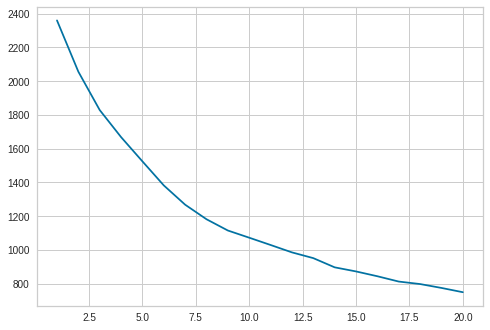

In [83]:
sns.lineplot(y=INERTIA, x=range(1, 21))

Kesimpulan: Dari grafik, penurunan drastis ada di 7, atau 8.

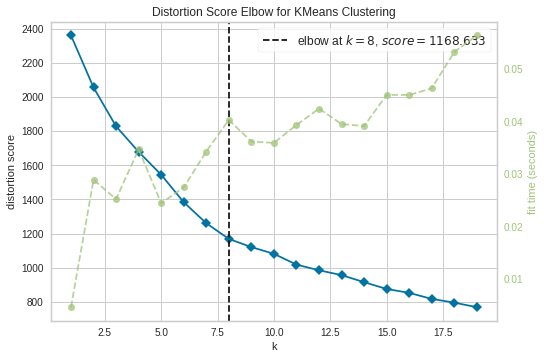

In [84]:
np.random.seed(31415)
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Gunakan 8

In [86]:
km = KMeans(n_clusters=8)
km.fit(X)
df_corporate_agg['cluster'] = km.predict(X)
df_corporate_agg

,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales,cluster
Customer ID,,,,,,,,,,,
AB-10600,0.750000,0.000000,0.000000,0.250000,0.250000,0.375000,0.375000,189.482750,8,1515.862,0
AC-10420,0.000000,0.400000,0.000000,0.600000,0.200000,0.800000,0.000000,185.160000,5,925.800,6
AC-10615,0.000000,0.000000,0.055556,0.944444,0.222222,0.555556,0.222222,140.982556,18,2537.686,1
AG-10300,0.200000,0.000000,0.000000,0.800000,0.400000,0.600000,0.000000,73.509600,5,367.548,6
AG-10495,0.071429,0.142857,0.142857,0.642857,0.142857,0.714286,0.142857,101.374786,14,1419.247,6
...,...,...,...,...,...,...,...,...,...,...,...
VG-21805,0.200000,0.000000,0.000000,0.800000,0.000000,0.800000,0.200000,83.686400,5,418.432,6
VP-21760,0.571429,0.000000,0.000000,0.428571,0.357143,0.428571,0.214286,240.037571,14,3360.526,0
VW-21775,0.166667,0.222222,0.000000,0.611111,0.222222,0.444444,0.333333,340.779889,18,6134.038,2


##Segment Analysis

In [87]:
df_corporate_agg['cluster'].value_counts()

1    59
6    52
0    38
5    37
2    29
3    13
4     4
7     4
Name: cluster, dtype: int64

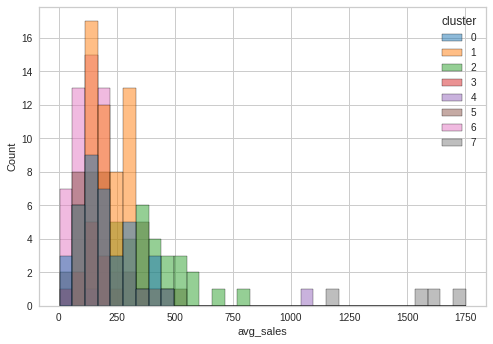

In [88]:
sns.histplot(data=df_corporate_agg, x='avg_sales', hue='cluster', palette='tab10')

##BootStrapping

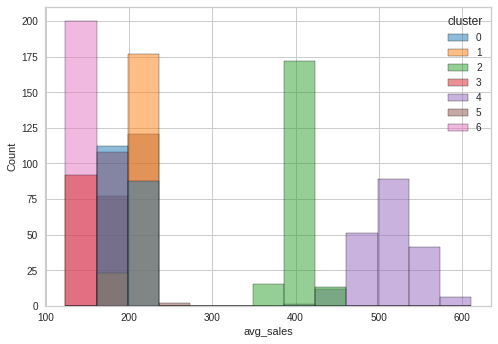

In [89]:
column = 'avg_sales'
df_boots = bootstrap(df_corporate_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

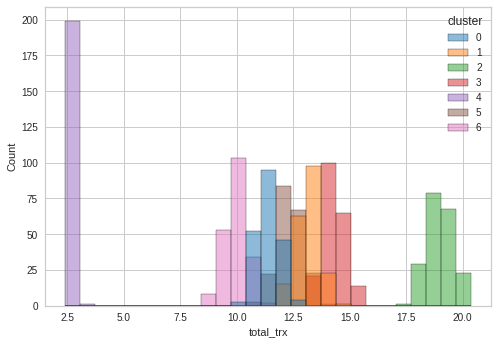

In [90]:
column = 'total_trx'
df_boots = bootstrap(df_corporate_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

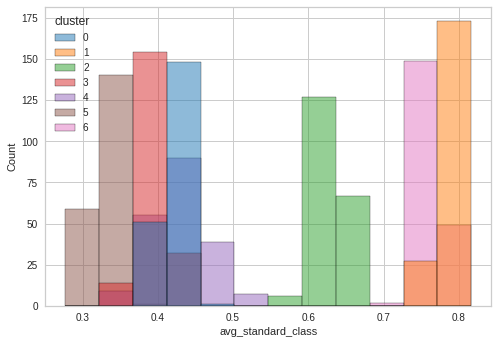

In [91]:
column = 'avg_standard_class'
df_boots = bootstrap(df_corporate_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

In [ ]:
column = 'avg_sales'
df_boots = bootstrap(df_corporate_agg, column)
sns.histplot(data=df_boots, x=column, hue='cluster', palette='tab10')

##Agregasi Per Cluster

In [92]:
df_cluster_agg = df_corporate_agg.groupby('cluster').median().reset_index()
df_cluster_agg

,cluster,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales
0,0,0.381944,0.125000,0.000000,0.444444,0.166667,0.611111,0.218254,191.607986,10.5,2248.1265
1,1,0.000000,0.111111,0.000000,0.800000,0.250000,0.500000,0.238095,197.997500,12.0,2454.9280
2,2,0.133333,0.133333,0.000000,0.625000,0.214286,0.578947,0.217391,374.913357,18.0,6987.1960
3,3,0.166667,0.090909,0.235294,0.411765,0.300000,0.650000,0.058824,135.433412,14.0,2240.5800
4,4,0.433333,0.000000,0.000000,0.366667,0.900000,0.000000,0.000000,428.126000,2.5,1686.8820
5,5,0.062500,0.523810,0.000000,0.400000,0.230769,0.619048,0.142857,193.664000,11.0,1936.6400
6,6,0.071429,0.114379,0.000000,0.750000,0.148352,0.738636,0.077381,142.153286,9.0,1295.2330
7,7,0.083333,0.000000,0.222222,0.666667,0.083333,0.500000,0.194444,1573.110083,7.5,9926.4325


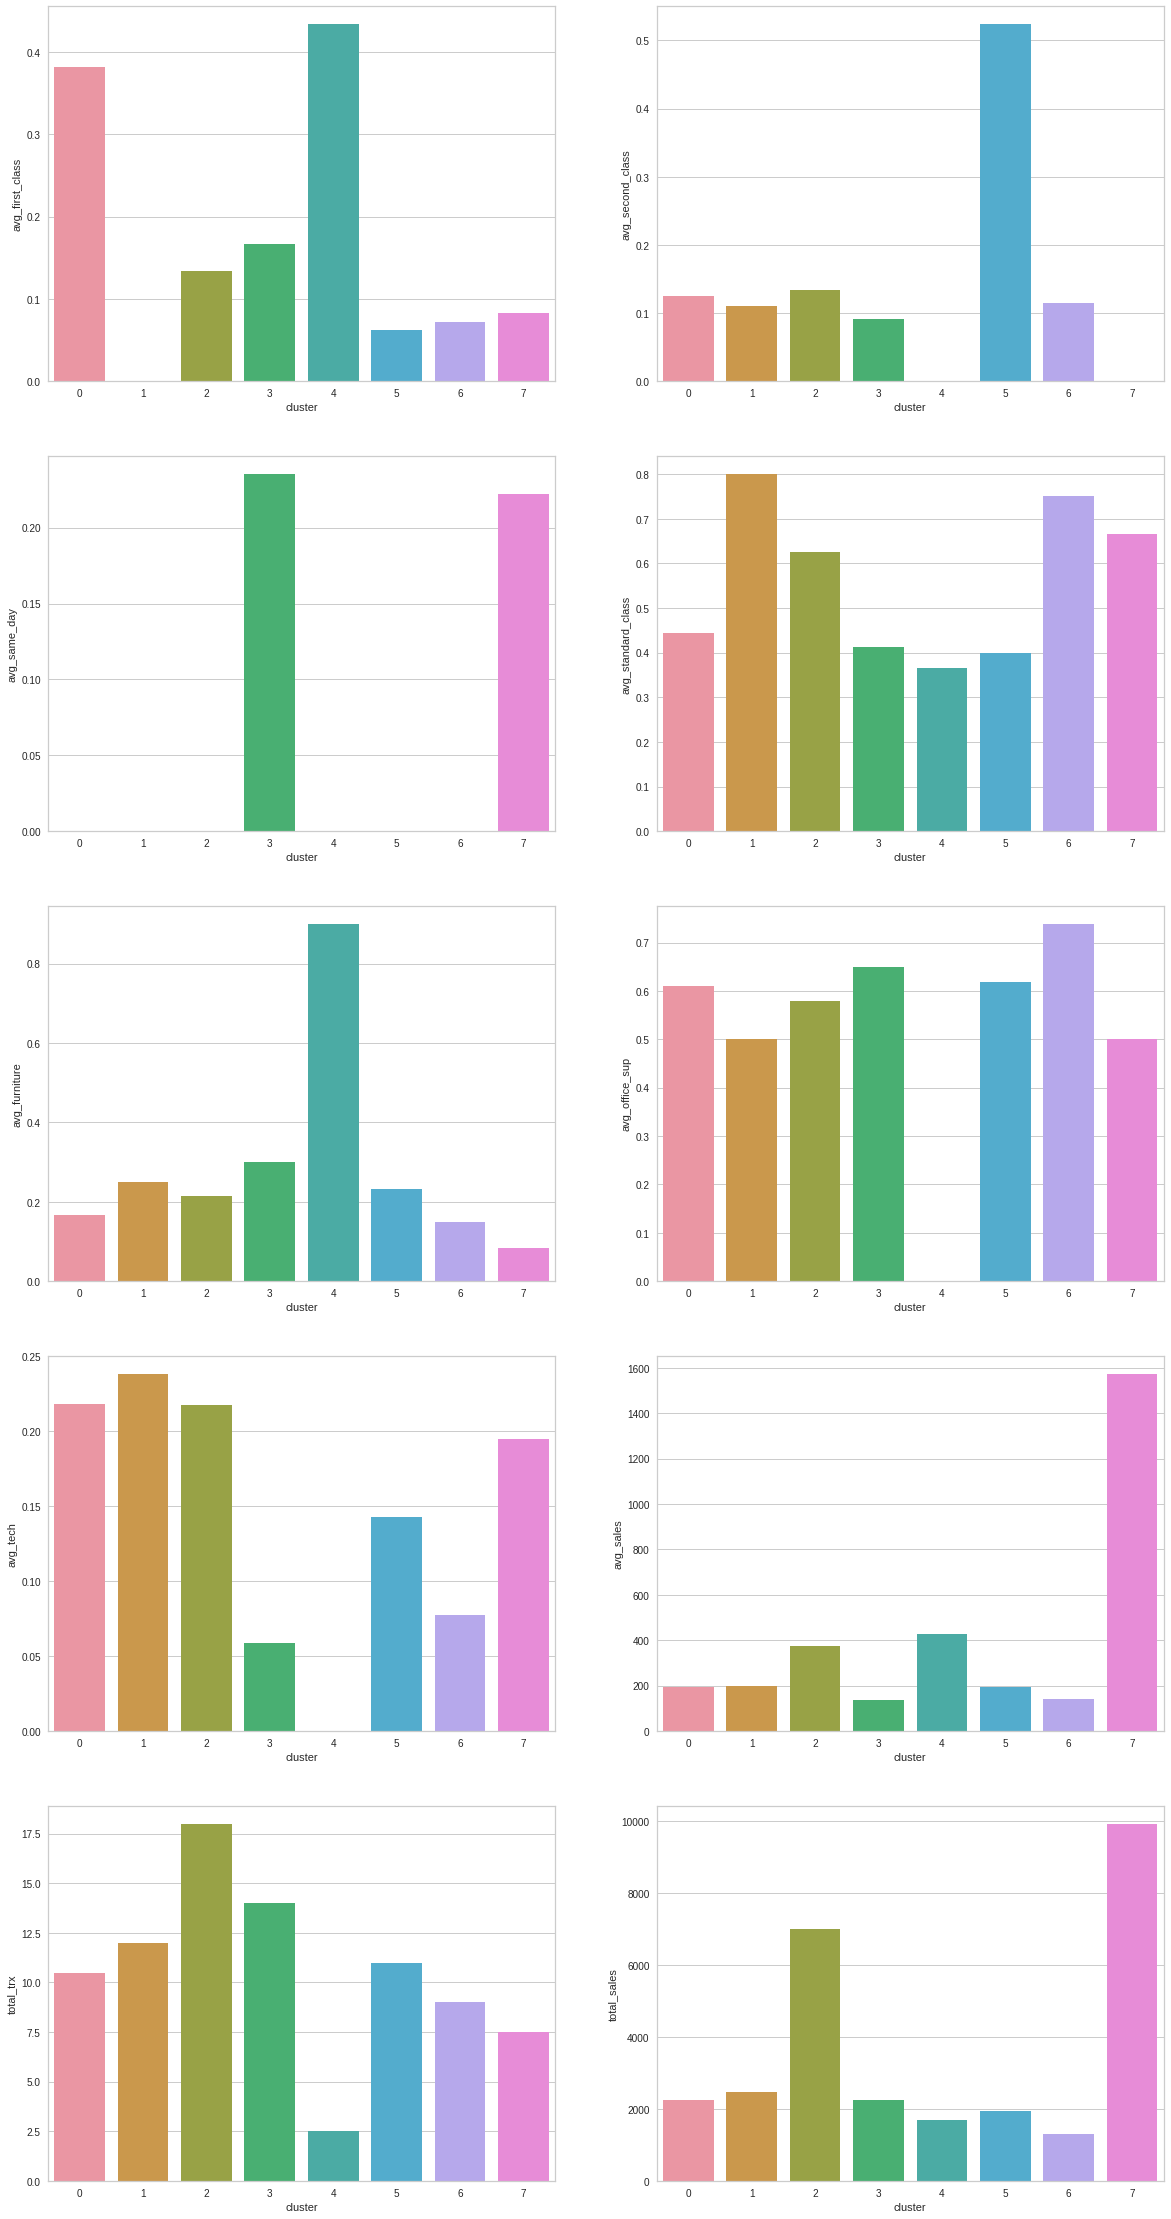

In [93]:
columns = df_cluster_agg.columns[1:]

fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(20, 40))
for r in range(5): # jumlah baris / rows
    for c in range(2):  # jumlah column
        # avg_second_class => r=0, c=1
        column_idx = (r*2) + c # --> ngambil index columns yang ke (0*2) + 1 = 1
        sns.barplot(data=df_cluster_agg, x='cluster', y=columns[column_idx], ax=axs[r][c])

Ans: Cluster(Corporate) \
1.Cluster 7 merupakan cluster dengan AVG sales paling banyak \
2.Cluster 7 merupakan cluster dengan Total sales paling banyak \
3.Cluster 4 merupakan cluster dengan jumlah first class terbanyak \


In [94]:
columns

Index(['avg_first_class', 'avg_second_class', 'avg_same_day',
       'avg_standard_class', 'avg_furniture', 'avg_office_sup', 'avg_tech',
       'avg_sales', 'total_trx', 'total_sales'],
      dtype='object')

In [99]:
customer_id_hvc1 = df_corporate_agg[df_corporate_agg['cluster'] == 7]
customer_id_hvc1

,avg_first_class,avg_second_class,avg_same_day,avg_standard_class,avg_furniture,avg_office_sup,avg_tech,avg_sales,total_trx,total_sales,cluster
Customer ID,,,,,,,,,,,
BS-11365,0.222222,0.0,0.111111,0.666667,0.444444,0.333333,0.222222,1166.850333,9,10501.653,7
GT-14635,0.000000,0.0,0.333333,0.666667,0.166667,0.666667,0.166667,1558.535333,6,9351.212,7
MW-18235,0.000000,0.0,0.333333,0.666667,0.000000,0.333333,0.666667,1751.292000,3,5253.876,7
TC-20980,0.166667,0.0,0.000000,0.833333,0.000000,0.833333,0.166667,1587.684833,12,19052.218,7
